# Projeto 2 - Predição de preços de casas

## House Prices - Advanced Regression Techniques

<p align='justify'>Peça a um comprador de imóveis para descrever a casa dos seus sonhos, e ele provavelmente não começará com a altura do teto do porão ou a proximidade de uma ferrovia. Mas este conjunto de dados desta competição de playground prova que há muito mais detalhes que influenciam as negociações de preços do que o número de quartos ou uma cerca branca.</br>


## Sobre este projeto

Os principais pontos que serão avaliados:
* Levantamento de hipóteses
* Criação e seleção de características
* Manipulação de dados e criação de gráficos simples com o Pandas
* Criar um modelo de predição
* Apresentação dos resultados

## Preparação do ambiente

Para este projeto, acessem o link - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques e logo abaixo cliquem em "Download". Caso você não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.

## Exercício

<p aligh='justify'>Neste projeto você deverá desenvolver a partir do que já vimos nos projetos anteriores, você poderá usar qualquer um dos modelos vistos durante as aulas, siga este roteiro e preencha cada parte.</p>

### 1. Análise exploratória de dados (1.0 ponto)

Realize a análise exploratória de dados, observe cada variável, como se comportam em relação a outras variáveis independentes e com a variável dependente.


Carregando as bibliotecas necessárias

In [79]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 500)

Leitura dos dados e display as informações gerais dos dados.

In [80]:
dados = pd.read_csv('train.csv').drop('Id', axis=1)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Várias colunas possuem valores nulos.

Descrição das variáveis numéricas.

In [81]:
dados.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Cálculo da correlação entre as variáveis e exibição das vários mais correlacionadas com a variável alvo SalePrice.

In [82]:
correlacoes = dados.corr()
correlacoes.loc[correlacoes.SalePrice.abs() >= 0.5]['SalePrice']  # Exibição das variáveis cujo o módulo da correlação com a variável SalePrice é maior ou igual a 0,5

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

Exibição das variáveis cujo módulo da correlação com SalePrice é menor que 0,5

In [83]:
correlacoes.loc[correlacoes.SalePrice.abs() < 0.5]['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallCond     -0.077856
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
Fireplaces       0.466929
GarageYrBlt      0.486362
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

Descrição das variáveis categóricas

In [84]:
variaveis_categoricas = dados.drop(correlacoes.columns, axis=1)
variaveis_categoricas.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Frequências dos valores categóricos em relação ao total de registros no dataset.

In [85]:
for column in variaveis_categoricas.columns:
    print(column)
    print(variaveis_categoricas[column].value_counts() / len(dados))
    print('='*80)

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Alley
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
Sawye

### 2. Levantamento de hipóteses (1.0 ponto)

Descreva quais hipóteses você observou ao fazer a análise exploratória de dados.


<p align='justify'>A análise exploratória permitiu identificar as variáveis mais correlacionadas com o preço de venda do imóvel (`SalePrice`). Quanto as variáveis categóricas foram identificadas que existem variáveis com pouca variação entre os registros, algumas variáveis categóricas têm o mesmo valor para mais de 90% do registros. Variáveis com variação tão baixa entre os registros podem não fornecer informação útil para a definição do preço de venda do imóvel.</p>

A hipótese geradas a partir da análise exploratória foram:</br>
* Estaria o preço dos imóveis, nesta base de dados, diretamente ligado a idade, tamanho e qualidade do imóvel?</br>
* Existem variáveis que não apresentam distinção entre os imóveis? </br>
* Para quais variáveis categóricas há maior variação de preço? </br>
* Há bairros onde exista casas com perfil de preço mais elevado? </br>

### 3. Apresentação das ideias obtidas (1.0 ponto)

Apresente com gráficos as suas observações e descreva cada gráfico.


Correlação entre as variáveis numéricas e o preço de venda do imóvel.

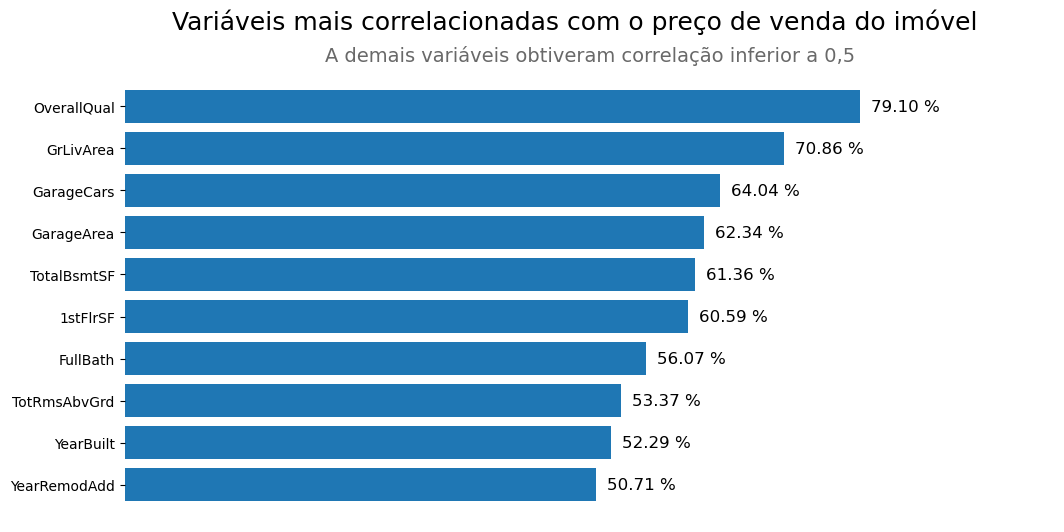

In [86]:
import matplotlib.pyplot as plt

correlacoes_consideraveis = correlacoes[correlacoes.SalePrice.abs() >= 0.5].SalePrice
correlacoes_consideraveis = correlacoes_consideraveis.iloc[:-1].sort_values() * 100

plt.figure(figsize=(12, 6), dpi=100)
fig = plt.barh(correlacoes_consideraveis.index, correlacoes_consideraveis)
plt.xlim(0, 100)
plt.suptitle('Variáveis mais correlacionadas com o preço de venda do imóvel', fontsize=18)
plt.title('A demais variáveis obtiveram correlação inferior a 0,5', fontsize=14, color='dimgray')
plt.bar_label(fig, labels=['%.2f %%' % e for e in fig.datavalues], padding=8, fontsize=12)
plt.box(False)
plt.xticks([]);

<p align='justify'>O gráfico acima mostra que algumas das variáveis mais correlacionadas com o preço do imóvel referem-se a qualidade (<code>OveralQual</code>), tamanho (<code>GrLivArea, GarageCars, GarageArea, TotalBmstSF, 1stFlrSF</code>) e idade (<code>YearBuilt, YearRemodAdd</code>) do imóvel. Não é surpresa, entre estas variáveis, a de maior correlação com o preço do imóvel seja a qualidade geral do mesmo, pois, é esperado que imóveis com melhor estrutura tenham preços maiores que imóveis em piores condições estruturais.</p>

Distribuição de frequência de alguma das variáveis categóricas

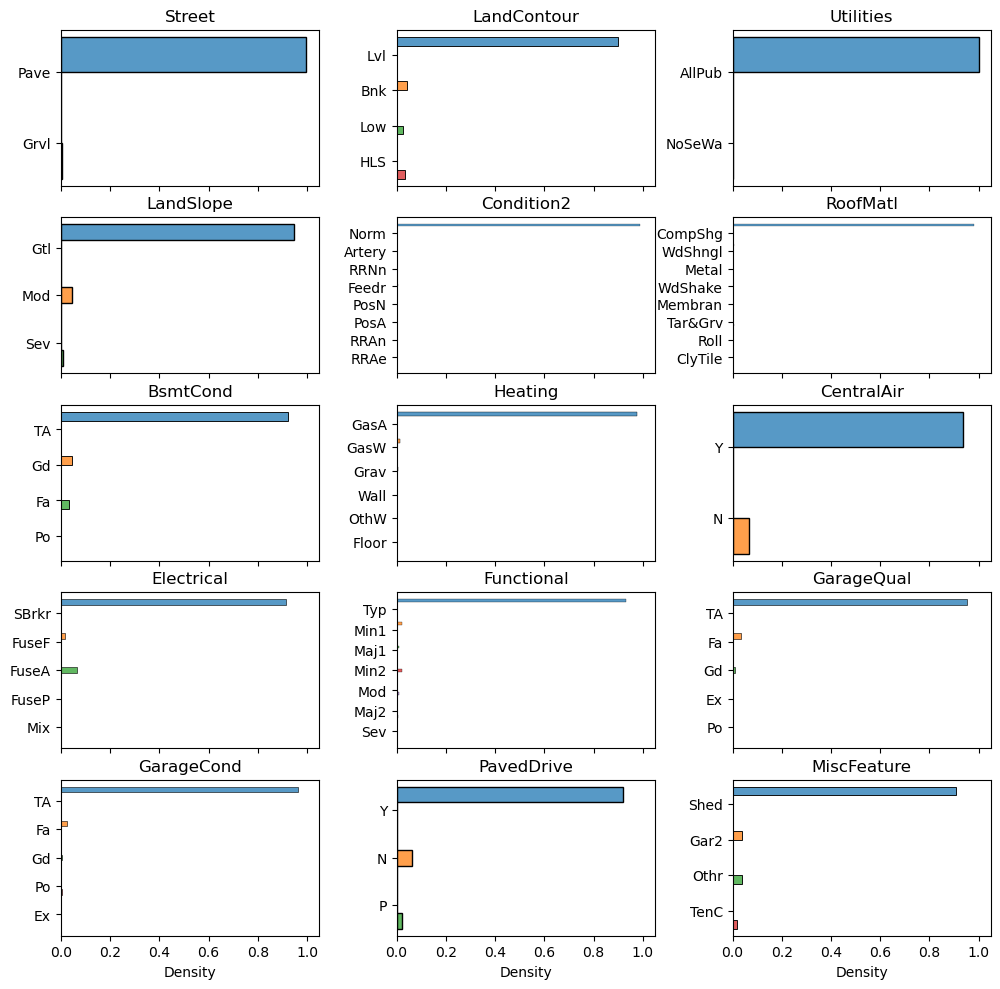

In [87]:
colunas = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2',
            'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional',
            'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature']

fig, axes = plt.subplots(5, 3, figsize=(12, 12), dpi=100, sharex=True)
i = 0

for l in range(5):
    for c in range(3):
        sns.histplot(data=dados, y=colunas[i], multiple="dodge", ax=axes[l, c],
                     hue=colunas[i], legend=False, stat = 'density')
        axes[l, c].set_ylabel('')
        axes[l, c].set_title(colunas[i])
        i += 1
plt.subplots_adjust(wspace=.3)


<p align='justify'>
    A figura acima mostra a distribuição das variáveis em que se observou concentração dos registros em apenas uma única classe. Devido a baixa variabilidade destas variáveis elas não podem ser consideradas como explicativas do preço final dos imóveis. Elas representam apenas o perfil mais comum (moda) dos imóveis da região.
</p>

<p align='justify'>A seguir são plotados histogramas com a variação do preço médio dos imóveis para algumas das variáveis categóricas. Foram selecionadas as variáveis categóricas com maior variação entre os registros.</p>

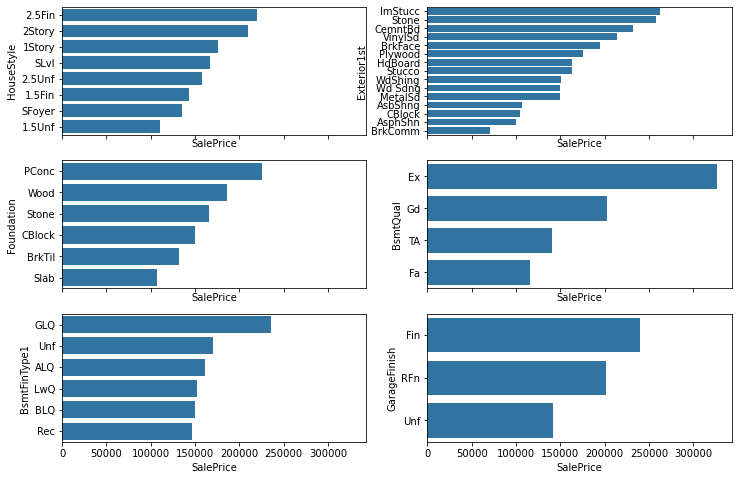

In [88]:
colunas = ['HouseStyle', 'Exterior1st', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'GarageFinish']

fig, axes = plt.subplots(3, 2, figsize=(12,8), sharex=True)
i = 0
for l in range(3):
    for c in range(2):
        freq = dados.groupby(colunas[i])['SalePrice'].mean().to_frame().reset_index().sort_values(by='SalePrice', ascending=False)
        sns.barplot(data=freq, y=colunas[i], x='SalePrice', ax=axes[l,c], color='#1f77b4')
        i += 1
    

<p align='justify'>Os gráficos acima mostram que existem algumas variáveis categóricas nas quais os preços médios dos imóveis são mais elevados que nas demais. Em outras como a <code>BsmtFinType1</code> apenas uma das classes possui valor médios dos imóveis significativamente diferente das demais. Estas observações deverão ser consideradas no momento de realizar a selação dos atributos. </p>

Variação do preço médio dos imóveis de acordo com o bairro.

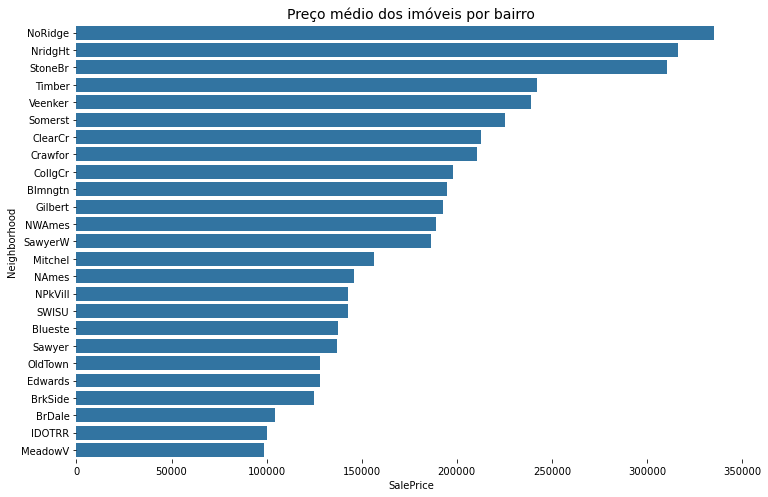

In [89]:
media_por_bairro = dados.groupby('Neighborhood')['SalePrice'].mean().to_frame().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=media_por_bairro.sort_values(by='SalePrice', ascending=False), x='SalePrice', y='Neighborhood', color='#1f77b4')
plt.box(False)
plt.title('Preço médio dos imóveis por bairro', fontsize=14)
plt.show()

<p align='justify'>O gráfico acima mostra que existe uma clara distinção de preço entre os bairros do dataset. Enquanto a média de preço dos três bairros mais caros ultrapassa os US$ 30000,00 nos três bairros mais baratos a média de preço fica abaixo de US$ 100000,00.</p>

### 4. Preparação dos dados (1.0 ponto)

Faça um processamento nos dados, preenchendo valores faltantes, removendo dados ou variáveis inconsistentes e normalizado os dados


No dataset fornecido existem muitas incosistências e dados faltantes. A correção de todas as falhas e inconsistências será feita em partes.

Primeiramente, e já dando início a seleção de atributos, irei remover algumas colunas que não trazem informação útil para a solução do problema.

1º Remoção das variáveis com correlação quase nula com a variável target.

In [90]:
ano_venda = dados['YrSold'] # ano de venda têm correlação baixa com o preço final do imóvel mas irei preservá-la para uso posterior

In [91]:
variaveis_baixa_correlacao = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold']
dados = dados.drop(variaveis_baixa_correlacao, axis=1)
dados.shape

(1460, 73)

2º Remoção das variáveis com baixa frequência ou com mais de 90% dos registros concentrados em apenas uma classe.

In [92]:
variaveis_frequencia = ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope',
                        'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir',
                        'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive',
                        'PoolQC', 'Fence', 'MiscFeature']
dados = dados.drop(variaveis_frequencia, axis=1)
dados.shape

(1460, 55)

3º Verificação de colunas com valores Nulos

In [93]:
dt = dados.isna().sum()
dt[dt > 0].sort_values()

MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtFinType1     37
BsmtExposure     38
BsmtFinType2     38
GarageType       81
GarageYrBlt      81
GarageFinish     81
LotFrontage     259
FireplaceQu     690
dtype: int64

4º correção das colunas `MasVnrType` e `MasVnrArea`

In [94]:
dados.loc[dados.MasVnrType.isna()] # Distribuição dos registros nulos

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Reg,Inside,Gilbert,Norm,1Fam,2Story,6,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,625,Unf,235,860,Ex,860,1100,1960,1,2,1,4,1,Gd,8,2,TA,BuiltIn,2002.0,Fin,2,440,288,48,0,0,0,WD,Normal,216500
529,20,RL,NaN,32668,IR1,CulDSac,Crawfor,Norm,1Fam,1Story,6,3,1957,1975,Hip,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,No,Rec,1219,Unf,816,2035,TA,2515,0,2515,1,3,0,4,2,TA,9,2,TA,Attchd,1975.0,RFn,2,484,0,0,200,0,0,WD,Alloca,200624
650,60,FV,65.0,8125,Reg,Inside,Somerst,Norm,1Fam,2Story,7,6,2007,2007,Gable,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0,Unf,813,813,Ex,822,843,1665,0,2,1,3,1,Gd,7,0,NaN,Attchd,2007.0,RFn,2,562,0,0,0,0,0,WD,Normal,205950
936,20,RL,67.0,10083,Reg,Inside,SawyerW,Norm,1Fam,1Story,7,5,2003,2003,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,833,Unf,343,1176,Ex,1200,0,1200,1,2,0,2,1,Gd,5,0,NaN,Attchd,2003.0,RFn,2,555,0,41,0,0,0,WD,Normal,184900
973,20,FV,95.0,11639,Reg,Corner,Somerst,Norm,1Fam,1Story,7,5,2007,2008,Gable,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0,Unf,1428,1428,Ex,1428,0,1428,0,2,0,3,1,Gd,6,0,NaN,Attchd,2007.0,Fin,2,480,0,120,0,0,0,New,Partial,182000
977,120,FV,35.0,4274,IR1,Inside,Somerst,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,1106,Unf,135,1241,Ex,1241,0,1241,1,1,1,1,1,Gd,4,0,NaN,Attchd,2007.0,Fin,2,569,0,116,0,0,0,New,Partial,199900
1243,20,RL,107.0,13891,Reg,Inside,NridgHt,Norm,1Fam,1Story,10,5,2006,2006,Gable,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,GLQ,1386,Unf,690,2076,Ex,2076,0,2076,1,2,1,2,1,Ex,7,1,Gd,Attchd,2006.0,Fin,3,850,216,229,0,0,0,New,Partial,465000
1278,60,RL,75.0,9473,Reg,Inside,CollgCr,Norm,1Fam,2Story,8,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,804,Unf,324,1128,Ex,1128,903,2031,1,2,1,3,1,Gd,7,1,Gd,Attchd,2002.0,RFn,2,577,0,211,0,0,0,WD,Normal,237000


Estas são duas variáveis relacionadas.</br>
 `MasVnrArea` refere-se a uma medida de área, quando não se aplica a residência é colocado o valor NA então substituirei por 0.</br>
`MasVnrType` quando não se aplica ao imóvel é colocado None como se trata de uma cetegórica irei criar a cetegoria NA (não se aplica)

In [95]:
dados['MasVnrArea'].loc[dados.MasVnrArea.isna()] = 0
dados['MasVnrType'].loc[dados.MasVnrType.isna()] = 'NA'

c:\Users\duart\miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


5º Correção das colunas `BsmtQual`, `BsmtFinType1`

In [96]:
dados[dados['BsmtQual'].isna()].filter(like="Bsmt") # visualizando todos os regitros com valores nulos relacionados ao Bsmt

,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath
17,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,0,NaN,0,0,0


Como ['BsmtQual', 'BsmtCond', 'BsmtFinType1'] são todas categóricos trocarei NaN pelo texto NA.

In [97]:
dados.loc[dados['BsmtQual'].isna(), ['BsmtQual', 'BsmtCond', 'BsmtFinType1']] = 'NA'

Vericando as variáveis BsmtExposure, BsmtFinType2

In [98]:
dados[dados['BsmtExposure'].isna()].filter(like="Bsmt")

,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtCond
17,NA,NaN,NA,0,NaN,0,0,0,NA
39,NA,NaN,NA,0,NaN,0,0,0,NA
90,NA,NaN,NA,0,NaN,0,0,0,NA
102,NA,NaN,NA,0,NaN,0,0,0,NA
156,NA,NaN,NA,0,NaN,0,0,0,NA
182,NA,NaN,NA,0,NaN,0,0,0,NA
259,NA,NaN,NA,0,NaN,0,0,0,NA
342,NA,NaN,NA,0,NaN,0,0,0,NA
362,NA,NaN,NA,0,NaN,0,0,0,NA
371,NA,NaN,NA,0,NaN,0,0,0,NA


Como BsmtExposure, BsmtFinType2 também são categóricas irei substituir os nulos por NA

In [99]:
dados.loc[dados['BsmtExposure'].isna(), ['BsmtExposure']] = 'NA'
dados.loc[dados['BsmtFinType2'].isna(), ['BsmtFinType2']] = 'NA'

6º Correção das colunas relacionadas a Garage

In [100]:
dados[dados['GarageType'].isna()].filter(like='Garage')

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,0,0
...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,0,0


In [101]:
garages = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
dados.loc[dados[garages[0]].isna(), garages] = 'NA' # São todas categóricas então irei preencher com NA


7º Correção da colna LotFrontage

In [102]:
qtd = dados.LotFrontage.value_counts().sum()
print('Quantidade de dados válidos em LootFrontage', qtd)
print('Porcentagem de dados válidos em LootFrontage em relação ao total de dados', 100 * qtd/len(dados))

Quantidade de dados válidos em LootFrontage 1201
Porcentagem de dados válidos em LootFrontage em relação ao total de dados 82.26027397260275


<AxesSubplot:>

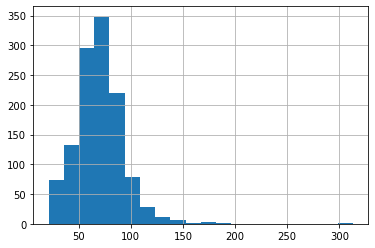

In [103]:
dados.LotFrontage.hist(bins=20) # histograma da variável

<AxesSubplot:>

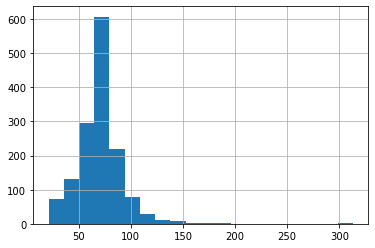

In [104]:
# histograma da variável substituidos os valores nulos pela média
LotFrontage = dados.LotFrontage.copy()
LotFrontage.fillna(LotFrontage.mean(), inplace=True)
LotFrontage.hist(bins=20)

Apesar de cria-se um pico no histograma a substituição pela média não afeta a distribuição geral dos dados. Portanto, irei substituir os valores nulos pela média da coluna.

In [105]:
dados.loc[dados.LotFrontage.isna(), 'LotFrontage'] = dados.LotFrontage.mean()

8º Correção da coluna `FirePlaceQu`

In [106]:
qtd = dados.FireplaceQu.value_counts().sum()
print('Quantidade de dados válidos em LootFrontage', qtd)
print('Porcentagem de dados válidos em LootFrontage em relação ao total de dados', 100 * qtd/len(dados))

Quantidade de dados válidos em LootFrontage 770
Porcentagem de dados válidos em LootFrontage em relação ao total de dados 52.73972602739726


In [107]:
dados.loc[dados.FireplaceQu.isna(), 'FireplaceQu'] = 'NA' # também são categóricos 

9º Como as últimas colunas têm muitos valores nulos irei simplesmente removê-las, juntamente com o Id.

In [108]:
dados.drop(['GarageQual', 'GarageCond', 'BsmtCond'], axis=1, inplace=True)
dt = dados.isna().sum()
dt[dt > 0].sort_values()

GarageYrBlt    81
dtype: int64

O Ano de construção de garagem ainda têm valores nulos mas antes de modificá-lo irei realizar a seleção de atributos e criação de variáveis.

### 5. Criação e seleção de características (1.0 ponto)


Observando as variáveis disponíveis, é possível criar novas variáveis? Ou trazer de um dado externo novos dados para agregar aos existentes? É possível selecionar um grupo de variáveis que melhor explicam a variável dependente?


<p align='justify'>Existe a possibilidade de criar novas variáveis a partir do conjunto de dados fornecido. Uma variável que pode ser criada é a idade do imóvel pois é mais lógico definir o preço do imóvel a partir de sua idade do que do ano que foi construído. Da mesma forma pode-se calcular o tempo decorrido desde a última removar e a construção da garagem. Poderia-se fazer pesquisar sobre características dos bairros onde os imóveis estão localizados como: IDH, criminalidade, transporte público, dentre outros, que acabam influenciando no preço dos imóveis. A seleção das variáveis que mais significativas para a formação dos preços dos imóveis também pode ser feita como descrito a seguir.</p>

#### Criando novas variáveis

Idade do imóvel, anos desde a última reforma e anos de construção da garagem.

In [109]:
colunas_ano = dados.filter(regex='Yr|Year').columns

for coluna in colunas_ano:
    dados[coluna] = ano_venda - dados[coluna]

dados['GarageYrBlt'].fillna(0, inplace=True) # Agora os valores nulos em GarageYrBlt serão substituidos por zero

Enconding das variáveis categóricas

In [110]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
colunas_categoricas = dados.select_dtypes(object).columns
dados[colunas_categoricas] = encoder.fit_transform(dados[colunas_categoricas])

In [111]:
dados.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,60,3.0,65.0,8450,3.0,4.0,5.0,2.0,0.0,5.0,7,5,5,5,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,4.0,2.0,706,6.0,150,856,0.0,856,854,1710,1,2,1,3,1,2.0,8,0,3.0,1.0,5.0,2.0,2,548,0,61,0,0,0,8.0,4.0,208500
1,20,3.0,80.0,9600,3.0,2.0,24.0,1.0,0.0,2.0,6,8,31,31,1.0,8.0,8.0,3.0,0.0,3.0,4.0,1.0,2.0,1.0,0.0,978,6.0,284,1262,0.0,1262,0,1262,0,2,0,3,1,3.0,6,1,5.0,1.0,31.0,2.0,2,460,298,0,0,0,0,8.0,4.0,181500
2,60,3.0,68.0,11250,0.0,4.0,5.0,2.0,0.0,5.0,7,5,7,6,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,2.0,2.0,486,6.0,434,920,0.0,920,866,1786,1,2,1,3,1,2.0,6,1,5.0,1.0,7.0,2.0,2,608,0,42,0,0,0,8.0,4.0,223500
3,70,3.0,60.0,9550,0.0,0.0,6.0,2.0,0.0,5.0,7,5,91,36,1.0,13.0,15.0,3.0,0.0,3.0,4.0,0.0,4.0,4.0,0.0,216,6.0,540,756,2.0,961,756,1717,1,1,0,3,1,2.0,7,1,2.0,5.0,8.0,3.0,3,642,0,35,272,0,0,8.0,0.0,140000
4,60,3.0,84.0,14260,0.0,2.0,15.0,2.0,0.0,5.0,8,5,8,8,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,0.0,2.0,655,6.0,490,1145,0.0,1145,1053,2198,1,2,1,4,1,2.0,9,1,5.0,1.0,8.0,2.0,3,836,192,84,0,0,0,8.0,4.0,250000


Todas as variáveis categóricas que antes eram textos agora são representadas por números. Isto será útil para os modelos de regressão.

Separação das variáveis independentes (X) e dependente (y)

In [112]:
X = dados.drop('SalePrice', axis=1)
y = dados['SalePrice']

Seleção de variáveis.

Removendo variáveis com baixa variância. A seguir serão removidas as colunas nas quais mais de 85% dos registros têm o mesmo valor.

In [113]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=.15)
X_sel = sel.fit_transform(X)
var_selecionadas = sel.get_feature_names_out()
X_sel = pd.DataFrame(X_sel, columns=var_selecionadas)
var_selecionadas

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea',
       'SaleType', 'SaleCondition'], dtype=object)

Normalização das variáveis

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X_sel)
X_std = pd.DataFrame(X_std, columns=X_sel.columns)

Selecionando as variáveis principais baseando-se no f_regression score.

In [115]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

seletor = SelectKBest(f_regression, k=20) # seleção das 20 principais variáveis

X_sel = seletor.fit_transform(X_std, y)
variaveis_selecionadas = seletor.get_feature_names_out()

X_sel = pd.DataFrame(X_sel, columns=variaveis_selecionadas)

variaveis_selecionadas

array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea'], dtype=object)

### 6. Decisão do modelo (1.0 ponto)

Dado toda a análise realizada nos pontos anteriores, qual modelo melhor se adequa a este problema? E por que?


Os modelos que melhor se aplicam a esta situação são os de regressão. Porquê estamos querendo prever um valor de uma variável a partir do conjunto de variáveis fornecido.

### 7. Modelagem (1.0 ponto)

Divida os dados em teste e treino, construa o seu modelo e teste alterar os parâmetros utilizados por ele.


Serão testados alguns modelos de regressão disponíveis no sklearn.

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Sepração dos conjuntos de treino e tes
X_treino, X_teste, y_treino, y_teste = train_test_split(X_sel, y, test_size=.3, random_state=101)

# Função para rodar, testar e exibir o resultados das métricas de cada modelo
def run_modelo(modelo):
    modelo.fit(X_treino, y_treino)
    pred = modelo.predict(X_teste)
    r2 = r2_score(y_teste, pred)
    mae = mean_absolute_error(y_teste, pred)
    mape = mean_absolute_percentage_error(y_teste, pred) * 100
    print('R² = {0:.2f}; MAE = US$ {1:.2f}; MAPE = {2:.2f}%'.format(r2, mae, mape))

# Primeiro modelo: Regressão Linear
print('Linear Regression')
run_modelo(LinearRegression())

# Segundo modelo: Random Forest
print('RandomForestRegressor')
run_modelo(RandomForestRegressor(random_state=101))

# Terceiro modelo: Gradient Boosting
print('GradientBoostingRegressor')
run_modelo(GradientBoostingRegressor(random_state=101))


Linear Regression
R² = 0.71; MAE = US$ 22099.91; MAPE = 13.33%
RandomForestRegressor
R² = 0.85; MAE = US$ 18415.39; MAPE = 11.42%
GradientBoostingRegressor
R² = 0.89; MAE = US$ 17528.17; MAPE = 10.79%


De acordo com as métricas obtidas o melhor modelo é o Gradiente Boosting, pois têm o maior valor de R² e menor valor de MAE. A seguir será feita a otimização dos hiper-parâmetros do modelo em busca de melhores resultados.

In [117]:
import numpy as np

n_estimators_list = [100, 200, 400]
min_samples_split_list = [2, 4, 8]

best_r2 = 0
best_mae = 999999

for n_estimators in n_estimators_list:
    for min_samples_split in min_samples_split_list:
        print('n_estimators =', n_estimators)
        print('min_samples_split =', min_samples_split)
        modelo = GradientBoostingRegressor(random_state=101,
                                            n_estimators=n_estimators,
                                            min_samples_split=min_samples_split)
        run_modelo(modelo)
        print('='*80)



n_estimators = 100
min_samples_split = 2
R² = 0.89; MAE = US$ 17528.17; MAPE = 10.79%
n_estimators = 100
min_samples_split = 4
R² = 0.89; MAE = US$ 17412.87; MAPE = 10.73%
n_estimators = 100
min_samples_split = 8
R² = 0.89; MAE = US$ 17432.93; MAPE = 10.73%
n_estimators = 200
min_samples_split = 2
R² = 0.89; MAE = US$ 17135.22; MAPE = 10.46%
n_estimators = 200
min_samples_split = 4
R² = 0.89; MAE = US$ 17058.58; MAPE = 10.40%
n_estimators = 200
min_samples_split = 8
R² = 0.90; MAE = US$ 17020.14; MAPE = 10.45%
n_estimators = 400
min_samples_split = 2
R² = 0.90; MAE = US$ 16629.00; MAPE = 10.13%
n_estimators = 400
min_samples_split = 4
R² = 0.90; MAE = US$ 16802.41; MAPE = 10.20%
n_estimators = 400
min_samples_split = 8
R² = 0.90; MAE = US$ 16430.36; MAPE = 10.07%


A melhor cofiguração de hiper-parâmetros, dentro dos conjuntos testados, é: n_estimators=400 e min_samples_split = 8.

### 8. Histórico (1.0 ponto)

Preencha a tabela abaixo com cada teste realizado com seu modelo. Não se preocupe caso você mude de ideia sobre qual modelo testar, mas não deixe de testá-lo exaustivamente e caso precise retorne para o passo de criação e seleção de características.


| Modelo | Parâmetros | R² | MAE | MAPE | Observação
-- | -- | -- | -- | -- | --
| LinearRegression | default | 0,71 | US$ 22099,91 | 13,33% |default refere-se as configuraçãoes padrões do Scikit-Learn |
| RandomForestRegressor | default | 0,85 | US$ 18415,39 | 11,42% |default refere-se as configuraçãoes padrões do Scikit-Learn |
| GradientBoostingRegressor | default | 0,89 | US$ 17528,17 | 10,79% | default refere-se as configuraçãoes padrões do Scikit-Learn |
| GradienteBoostingRegressor | n_estimators = 400</br> min_samples_split=8 | 0,90 | US$ 16430,36 | 10,07% |Valores do hiper-parâmetros testados:</br> n_estimators=[100, 200, 400]</br>min_samples_split=[2, 4, 8] |

_OBS_: No gitbook eram referidas as métricas: acurárica, precisão e sensitividade. Como estas métricas não se aplicam a problemas de regressão foram omitidas da tabela anterior.

### 9. Resultado (2.0 ponto)

Reúna os seus achados, os valores das métricas do seu melhor modelo obtido e o melhor conjunto de variáveis. Escreva abaixo um relatório que seria enviado para uma diretoria de uma empresa sobre seu trabalho.

---
**PROJETO:** 
Construiur modelo de predição de preços de imóveis baseados em característica do imóvel. </br>

**Descrição:**
<p align='justify'>A partir do dataset fornecido foi elaborado um modelo capaz de estimar o preço dos imóveis localizados em Ames city. Após análisse dos dados fornecidos, seleção de variáveis e correção de inconsistências foram testados três diferentes modelos de regressão. Entre os três modelos testados foi selecionado o modelo Gradiente Bossting, por ter tido o melhor desempenho dos três avaliados. O modelo final teve erro médio percentual de 10,07% o que corresponde a um erro médio absoluto aproximado de US$ 16430,36 e R² de 0,90.</p>

---

**DESCRIÇÃO DO MODELO SELECIONADO**</br>

**Modelo**: Gradiente Boosting</br>
**Erro médio percentual**: 10,07%
**Erro médio absoluto**: US$ 16430,36</br>
**R²**: 0.90</br>
**Variáveis de entrada**: OverallQual, YearBuilt, YearRemodAdd, MasVnrArea,
       ExterQual, BsmtQual, BsmtFinSF1, TotalBsmtSF, HeatingQC,
       1stFlrSF, GrLivArea, FullBath, KitchenQual, TotRmsAbvGrd,
       Fireplaces, GarageType, GarageYrBlt, GarageFinish,
       GarageCars, GarageArea</br>
**Parâmetros do modelo**: n_estimatos = 400, min_samples_split = 8</br>

----
**Etapas do projeto**

**1. Análise exploratória**

<p align='justify'>A partir da análise exploratória dos dados foram identificadas inconsistência da base de dados. As incosistências foram corrigidas e valores nulos removidos para dar proceguimento à etapa seguinte. Identificou-se que há bairros com concentração de imóveis com maiores preços médio de venda. A análise exploratória também permitiu identificar que o preço dos imóveis está diretamente relacionado a algumas variáveis da base de dados o que permite a aplicação de um modelo de regressão. </p>

**2. Seleção de variáveis**: 

As variáveis foram selecionadas de acordo com os seguintes critérios:
* 1º Deveria haver valores válidos em pelo menos 20% dos registros. 
* 2º Variáveis categóricas em que mais de 90% dos registros pertencessem a mesma classe foram removidas. 
* 3º Variáveis numéricas deveriam ter correlação com o preço de venda do imóvel superior a 0,5.
* 4º Para uma dada variável deveria haver variabilidade significativa, variáveis em que mais de 85% dos registros tivessem os mesmos valores foram removidas.
* 5º Utilizando um método de seleção automática baseado em regressão foram selecionadas as 20 variáveis mais significativas para a formação do preço do imóvel.</br>

**3. Seleção do modelo de regressão**:

<p align='justify'>Foram testados três modelos de regressão diferentes: Regressão Linear, Random Forest e Gradiente Boosting. Para avaliação do modelo o dataset, após seleção das variáveis de entrada, foi dividio em dois conjuntos: treino e teste. O conjunto de treino foi utilizado para o ajuste dos parâmetros do modelo e o de teste para o cálculo das métricas de avaliação. Os modelos foram avaliados a partir do conjundo de duas métrias: Erro Médio Absoluto e R². Os resultados para cada modelo são mostrados na tabela a seguir.</p>

| Modelo | R² | Erro Médio Absoluto | Erro médio percentual 
-- | -- | -- | --
| Regressão Linear | 0,71 | US$ 22099,91 | 13,33%
| Random Forest | 0,85 | US$ 18415,39 | 11,42%
| Gradiente Boosting | 0,89 | US$ 15528,17 | 10,79%

Assim, para a próxima etapa, foi selecionado o modelo Gradiente Boosting por ter as melhores métricas de R² e Erro Médio Absoluto.

**4. Processo de otimização do modelo**: 

<p align='justify'>Após a identificação do melhor modelo foram testados diferentes conjuntos de hiper-parâmetros buscando encontrar o conjunto otimizasse o desempenho do modelo. Entre os hiper-parâmetros do Gradiente Boosting foram ajustados os valores de <code>n_estimators</code> e <code>min_samples_split</code>. <code>n_estimators</code> corresponde a quantidade de estimadores a serem utilizados para a regressão. O Gradiente Boosting é um modelo de ensemble, assim, em sua construção são geradas diferentes versões do modelo (os estimadores) com variações em seus parâmetros. Como resposta final o modelo utiliza a média das predições realizadas por cada um dos estimadores. <code>min_samples_split</code> refere-se ao número de amostra mínimo que cada nó da árvores precisa ter antes que exista a derivação de um novo ramo da árvore. A tabela a seguir mostra as combinações de hiper-parâmetros utilizadas e as métricas de avaliação de cada uma.</p>

| n_estimators | min_samples_split | R² | Erro Médio Absoluto | Erro Médio Percentual
-- | -- | -- | -- | --
| 100 | 2 | 0,89 | US$ 17528,17 | 10,79%
| 100 | 4 | 0,89 | US$ 17412,87 | 10,73%
| 100 | 8 | 9,89 | US$ 17432,93 | 10,73%
| 200 | 2 | 0,89 | US$ 17135,22 | 10,46%
| 200 | 4 | 0,89 | US$ 17058,58 | 10,40%
| 200 | 8 | 0,90 | US$ 17029,14 | 10,45%
| 400 | 2 | 0,90 | US$ 16629,00 | 10,13%
| 400 | 4 | 0,90 | US$ 16802,41 | 10,20%
| 400 | 8 | 0,90 | US$ 16430,36 | 10,07%

**6. Dicionário de dados das variáveis selecionadas**

_OverallQual_: Classifica o material geral e o acabamento da casa
| Valor | Descrição |
--  | --
10	| Muito excelente
9 |	Excelente
8 |	Muito bom
7 |	Bom
6  |	Acima da média
5  |	Médio
4 |	Abaixo da média
3 |	Fraco
2 |	Ruim
1 |	Muito ruim

_YearBuilt_: Idade do imóvel no momento da venda</br>
_YearRemodAdd_: Anos desde a última reforma no momento da venda</br>
_MasVnrArea_: Área do folheado de alvenaria em pés quadrados</br>
_ExterQual_: Avalia a qualidade do material do exterior
|Valor|Descrição|
-- | --
Ex | Excelente
Gd | Bom
TA | Médio
Fa | Fraco
Po | Ruim

_BsmtQual_: Avalia a altura do porão
|valor|Descrição|
--|--
Ex | Excelente (+100 polegadas)
Gd | Bom (90-99 polegadas)
TA | Médio (80-=89 polegadas)
Fa | Fraco (70-79 polegadas)
Po | Ruim (<70 polegadas)
NA | Sem porão

_BsmtFinSF1_: Pés quadrados acabados do porão</br>
_TotalBsmtSF_: Área total do porão</br>
_HeatingQC_: Qualidade do sistema de aquecimento</br>
|valor|Descrição|
--|--
Ex | Excelente
Gd | Bom
TA | Média
Fa | Fraco
Po | Ruim

_1stFlrSF_: Área do primeiro andar em pés quadrados</br>
_GrLivArea_: Área de estar acima do nível (chão) pés quadrados</br>
_FullBath_: Banheiros completos</br>
_KitchenQual_: Qualidade da cozinha
|valor|Descrição|
--|--
Ex | Excelente
Gd | Bom
TA | Médio
Fa | Fraco
Po | Ruim

_TotRmsAbvGrd_: Total de quartos</br>
_Fireplaces_: Número de lareiras</br>
_GarageType_: Localização da garagem
|valor|Descrição|
-- | --
2Types | Mais de um tipo de garagem
Attchd | Conectada com a casa
Basment | Garagem no subsolo
BuiltIn | Garagem como parte da casa (geralmente têm um quarto acima)
CarPort | Port de carro
Detchd  | Separada da casa
NA | Sem garagem

_GarageYrBlt_: Anos desde que a garagem foi construida em relação ao ano de venda</br>
_GarageFinish_: Interior finalizado da garagem
|valor|Descrição|
--|--
Fin | Finalizado
RFn | Acabamento rústico
Unf | Não finalizado
NA | Sem garagem

_GarageCars_: Número de vagas na garagem.</br>
_GarageArea_: Área da garagem em pés quadrados.</br>